# 선형회귀(Linear regression)
- 원인이 되는 설명 변수(독립변수,Feature)에 따른 종속변수(class,label,target)의 결과를 예측
$$
y = b_0 + b_1x
$$
$$
y = b_0 + b_1x_1 +  b_2x_2 +  b_3x_3
$$

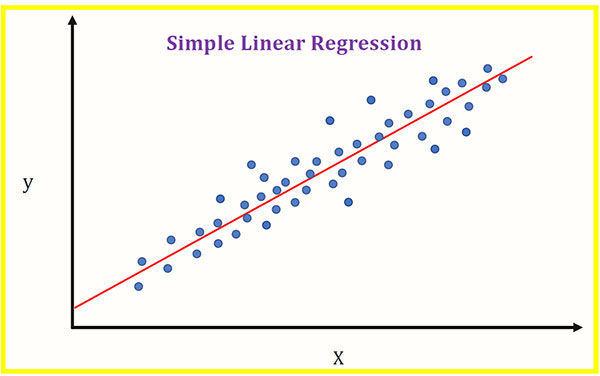

- 사이킷런에서 제공해주는 당뇨병 진행도 데이터셋 받아오기

In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target
data.shape , target.shape

((442, 10), (442,))

In [2]:
from sklearn.model_selection import train_test_split
SEED = 42
x_train, x_valid, y_train, y_valid = train_test_split(data,target,random_state= SEED)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_valid)

In [4]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid,pred) # MAE

41.548363283252066

In [5]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid,pred) ** 0.5 # RMSE

53.36942296795932

# 로지스틱 회귀분석(Logistic Regression)
- Regression(회귀)라는 단어가 들어가지만 분류모델
- 예측 결정으로 시그모이드 함수 사용
- 시그모이드함수 특징
    - 입력값이 양수 무한대로 입력이 들어가도 1에 가깝게 출력
    - 입력값이 음수 무한대로 입력이 들어가도 0에 가깝게 출력

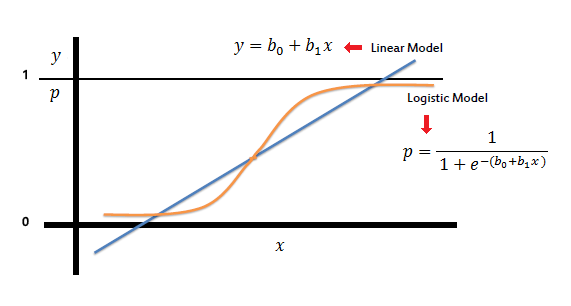

- 사이킷런에서 제공해주는 0~9까지 손글씨 데이터셋을 받아오기

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data / 255
target = (digits.target == 9).astype(int)

- holdout

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(data,target,random_state=SEED)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1347, 64), (450, 64), (1347,), (450,))

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=SEED) 
model.fit(x_train,y_train)
pred = model.predict_proba(x_valid)[:,1]
roc_auc_score(y_valid,pred)

0.9587997512437811

# K-NN
- 최근접 이웃 알고리즘
- 새로운 샘플이 K개의 가까운 이웃을 이용해서 예측
- 제일 가까운 데이터 포인트를 찾아서 결정하는 방식
- 회귀, 분류 둘다 사용한 알고리즘

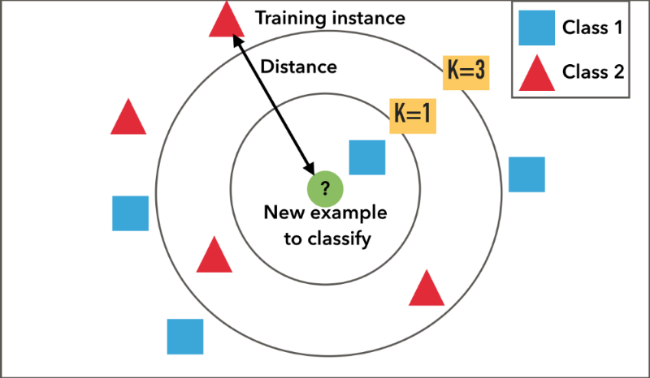

- 데이터 포인트간의 거리를 측정하는 방법
    - 유클리드 거리와 맨하튼 거리가 있다.

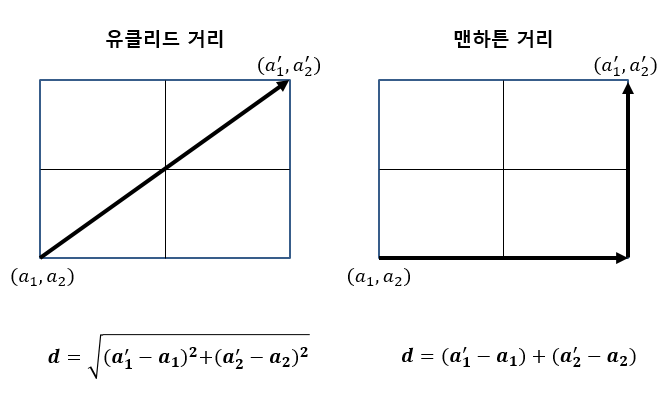

- KNeighborsClassifier
    - `n_neighbors` : 이웃수
    - `weights` : 
        - `uniform` : 기본값으로 거리에 상관없이 모든 이웃대해 동일취급 
        - `distance` : 거리에 따라 가중치를 부여
    - `p`
        - 2: 기본값으로 유클리드 거리
        - 1: 맨하튼 거리

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10,p=2,weights="distance")
model.fit(x_train,y_train)
pred = model.predict_proba(x_valid)[:,1]
roc_auc_score(y_valid,pred)

0.9991189883913765

# 인공신경망(Neural Network)
- 퍼셉트론(Perceptron)
    - 초기 형태의 인공신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘
- MLP(Multi-layer Perceptron)
    - 퍼셉트론으로 이루어진 층(layer)을 여러개 순차적으로 붙여 놓은 상태
- 회귀 ,분류 모두 사용 가능한 알고리즘

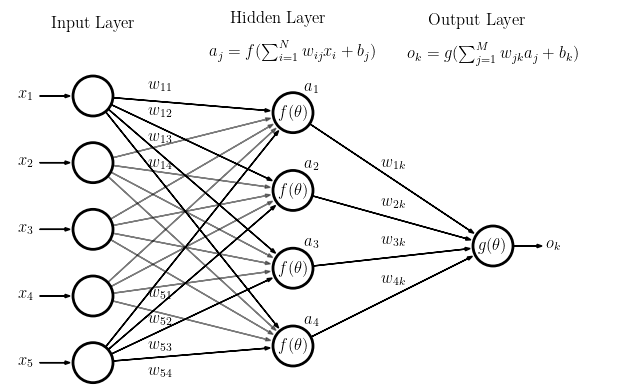

In [10]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=SEED,hidden_layer_sizes=(100,50), max_iter=500 )
model.fit(x_train,y_train)
pred = model.predict_proba(x_valid)[:,1]
roc_auc_score(y_valid,pred)

0.9984970978441128

# 의사결정나무(Decision Tree)
- 회귀,분류 둘다 사용 가능한 알고리즘
- 여러가지 규칙을 순차적으로 적용하면서 트리기반의 규칙을 만들어 예측하는 알고리즘
- 데이터를 분할 하는데 순수도가 높은 방향으로 규칙을 정한다.
- 순수도
    - 각 노드의 규칙에 의해 동일한 클래스가 포함되는 정도를 의미
    - 부모노드의 순수도에 비해 자식노드들에 순수도가 증가하도록 트리를 형성
- 순수도 척도
    - gini 와 entropy : 둘다 0에 가까울수록 순수도가 높아진다.

- root node: 최상단에 위치한 노드
- internal node: 중간에 위치한 노드
- leaf node: 최종 분류값을 가진다.(결정)


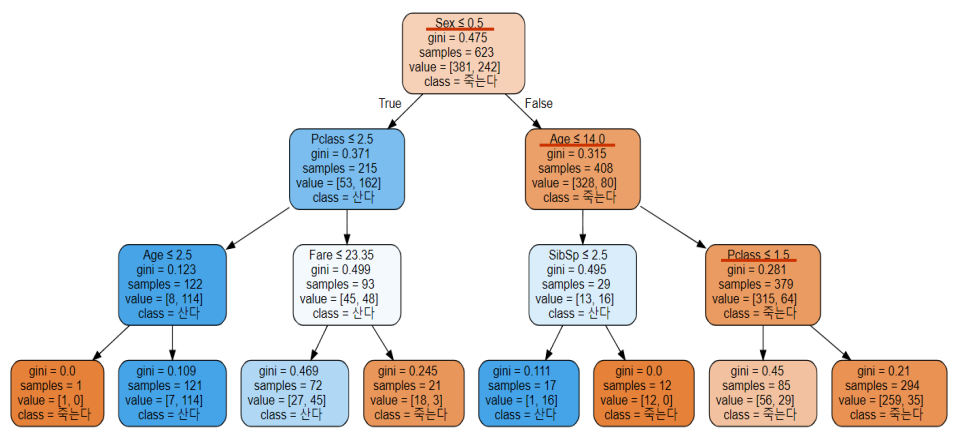

- 의사결정나무가 특성(Feature)에 대한 규칙을 정하는 방법

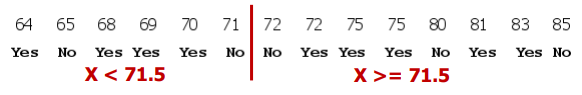

- DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier

hp = {
    "random_state":SEED,
    "max_depth":5,
    "min_samples_split":2, # 노드를 분할하는데 필요한 최소한의 샘플수
    "criterion" : "entropy", # 순수도 척도
    "max_leaf_nodes" : 10, # 최대리프노드수, 과적합 방지
    "min_samples_leaf" : 20, # 리프노드에 있어야할 최소 샘플수
}

model = DecisionTreeClassifier(**hp)
model.fit(x_train,y_train)
pred = model.predict_proba(x_valid)[:,1]

roc_auc_score(y_valid,pred)

0.9366967247097844

## 의사결정나무 시각화하기

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = sns.load_dataset("titanic")
df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
cols = ["pclass","age","sibsp","parch","fare"]
features = df[cols]
target = df["survived"]

In [35]:
from sklearn.preprocessing import OneHotEncoder
cols = ["sex","embarked"]
enc = OneHotEncoder(handle_unknown="ignore")

tmp = pd.DataFrame(
    enc.fit_transform(df[cols]).toarray(),
    columns= enc.get_feature_names_out()
)
features = pd.concat([features,tmp],axis = 1)
features.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
features.isnull().sum()

pclass            0
age             177
sibsp             0
parch             0
fare              0
sex_female        0
sex_male          0
embarked_C        0
embarked_Q        0
embarked_S        0
embarked_nan      0
dtype: int64

In [37]:
features.age = features.age.fillna(features.age.median())

In [38]:
hp = {
    "random_state" : SEED,
    "max_depth":3,
    "min_samples_split":2

}
model = DecisionTreeClassifier(**hp)
model.fit(features,target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [39]:
model.feature_importances_

array([0.21352543, 0.0618669 , 0.04492651, 0.        , 0.05080152,
       0.        , 0.62887964, 0.        , 0.        , 0.        ,
       0.        ])

In [40]:
features.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S', 'embarked_nan'],
      dtype='object')

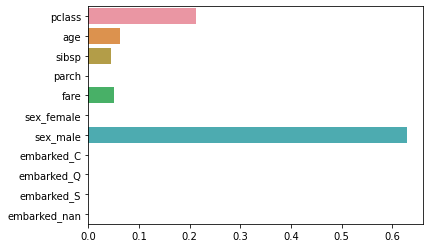

In [42]:
sns.barplot(x=model.feature_importances_,y=features.columns)
plt.show()

- 의사결정나무 모델 시각화하기

In [43]:
from sklearn.tree import export_graphviz

export_graphviz(model,out_file="tree.dot",feature_names=features.columns,class_names=["죽는다","산다"])

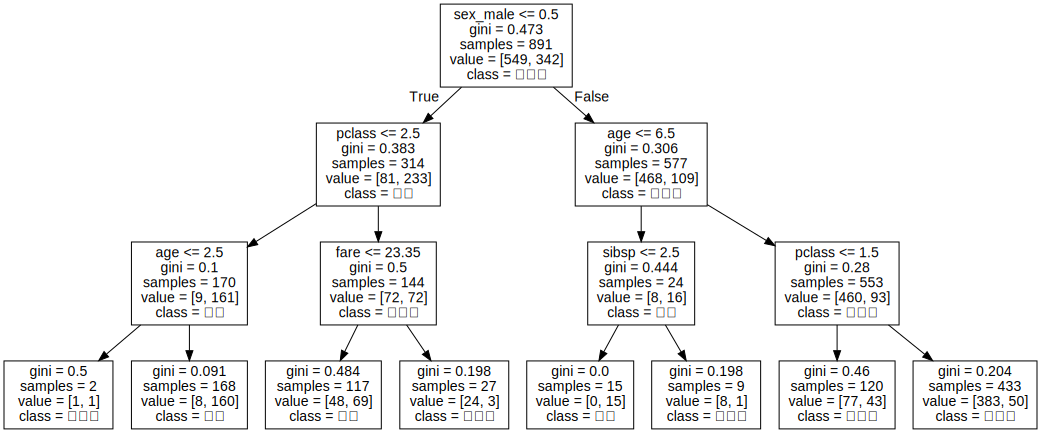

In [44]:
import graphviz
with open("tree.dot") as f:
    tree = graphviz.Source(f.read())
tree